In [234]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd

import random

import thinkstats2
import thinkplot
import seaborn as sns

import statsmodels.formula.api as smf


In [189]:
#White wine
white_wine_df = pd.read_csv('winequality-white.csv')
white_wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [190]:
#Red Wine
red_wine_df = pd.read_csv('winequality-red.csv')
red_wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [191]:
#Assign color of grapes based on dataset and combine
white_wine_df['grape_color'] = 'white'
red_wine_df['grape_color'] = 'red'
wine_dataset = pd.concat([white_wine_df, red_wine_df])

#Check to make sure length of wine dataset contains red and white dataset
len(wine_dataset) == len(white_wine_df) + len(red_wine_df)

True

<AxesSubplot:xlabel='fixed_acidity', ylabel='Count'>

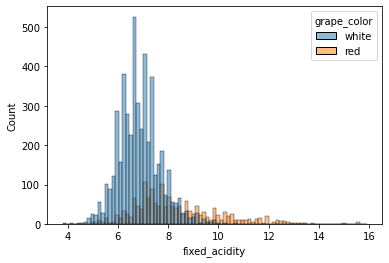

In [192]:
#Fixed Acidity
sns.histplot(data=wine_dataset,x='fixed_acidity', hue='grape_color')

<AxesSubplot:xlabel='volatile_acidity', ylabel='Count'>

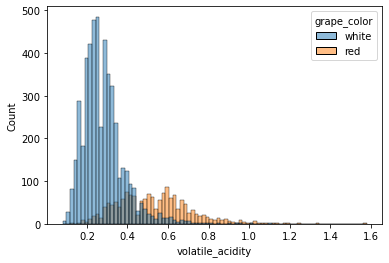

In [193]:
#Volatile Acidity
sns.histplot(data=wine_dataset,x='volatile_acidity', hue='grape_color')

<AxesSubplot:xlabel='citric_acid', ylabel='Count'>

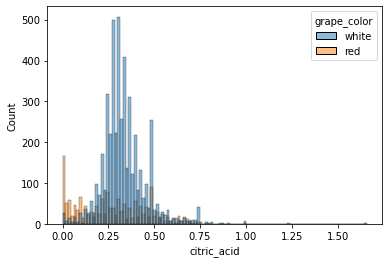

In [194]:
#Citric Acid
sns.histplot(data=wine_dataset,x='citric_acid', hue='grape_color')

<AxesSubplot:xlabel='residual_sugar', ylabel='Count'>

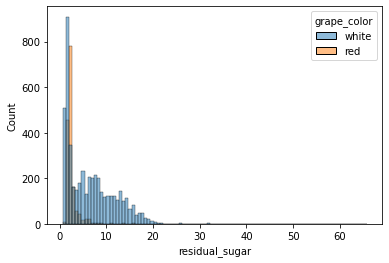

In [195]:
#Residual Sugar
sns.histplot(data=wine_dataset,x='residual_sugar', hue='grape_color')

<AxesSubplot:xlabel='chlorides', ylabel='Count'>

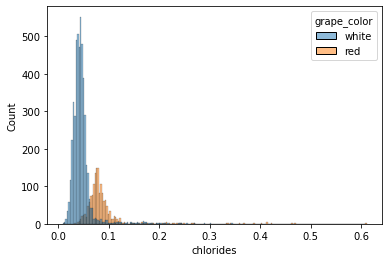

In [64]:
#Chlorides
sns.histplot(data=wine_dataset,x='chlorides', hue='grape_color')

<AxesSubplot:xlabel='free_sulfur_dioxide', ylabel='Count'>

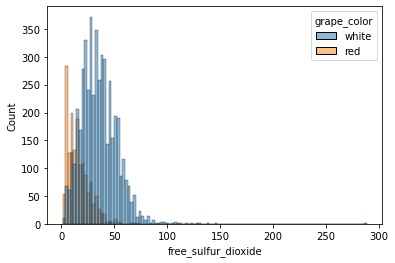

In [196]:
#Free Sulfur Dioxide
sns.histplot(data=wine_dataset,x='free_sulfur_dioxide', hue='grape_color')

<AxesSubplot:xlabel='total_sulfur_dioxide', ylabel='Count'>

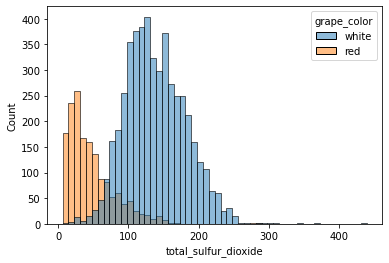

In [197]:
#Total Sulfur Dioxide
sns.histplot(data=wine_dataset,x='total_sulfur_dioxide', hue='grape_color')

<AxesSubplot:xlabel='density', ylabel='Count'>

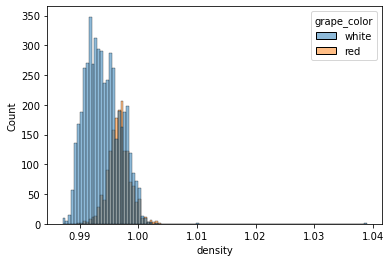

In [67]:
#Density
sns.histplot(data=wine_dataset,x='density', hue='grape_color')

<AxesSubplot:xlabel='pH', ylabel='Count'>

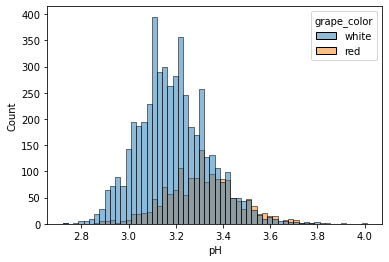

In [68]:
#pH
sns.histplot(data=wine_dataset,x='pH', hue='grape_color')

<AxesSubplot:xlabel='sulphates', ylabel='Count'>

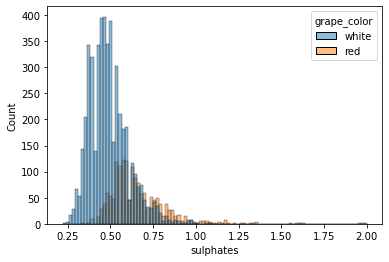

In [69]:
#Sulfates
sns.histplot(data=wine_dataset,x='sulphates', hue='grape_color')

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

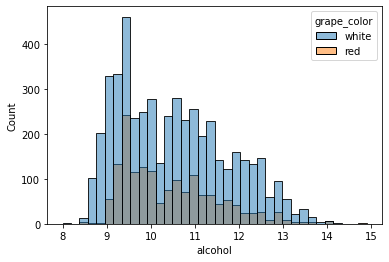

In [70]:
#Alcohol content
sns.histplot(data=wine_dataset,x='alcohol', hue='grape_color')

<AxesSubplot:xlabel='quality', ylabel='Count'>

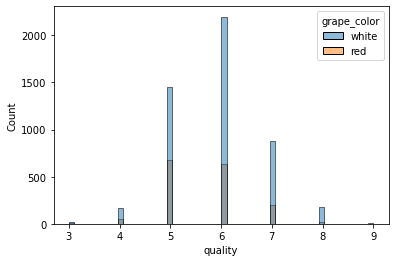

In [72]:
#Wine Quality
sns.histplot(data=wine_dataset,x='quality', hue='grape_color')

In [74]:
#Get Summary Statistics for All Data
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [198]:
#Fixed Acidity Summary Stats all and by grape color
wine_dataset["fixed_acidity"].describe()
wine_dataset[["fixed_acidity", "grape_color"]].groupby("grape_color").describe()

fixed_acidity                                              
                    count      mean       std  min  25%  50%  75%   max
grape_color                                                            
red                1599.0  8.319637  1.741096  4.6  7.1  7.9  9.2  15.9
white              4898.0  6.854788  0.843868  3.8  6.3  6.8  7.3  14.2

In [199]:
#Volatile Acidity Summary Stats all and by grape color
wine_dataset["volatile_acidity"].describe()
wine_dataset[["volatile_acidity", "grape_color"]].groupby("grape_color").describe()

volatile_acidity                                                  
                       count      mean       std   min   25%   50%   75%   max
grape_color                                                                   
red                   1599.0  0.527821  0.179060  0.12  0.39  0.52  0.64  1.58
white                 4898.0  0.278241  0.100795  0.08  0.21  0.26  0.32  1.10

In [200]:
#Citric Acid Summary Stats all and by grape color
wine_dataset["citric_acid"].describe()
wine_dataset[["citric_acid", "grape_color"]].groupby("grape_color").describe()

citric_acid                                                 
                  count      mean       std  min   25%   50%   75%   max
grape_color                                                             
red              1599.0  0.270976  0.194801  0.0  0.09  0.26  0.42  1.00
white            4898.0  0.334192  0.121020  0.0  0.27  0.32  0.39  1.66

In [201]:
#Residual Sugar Summary Stats all and by grape color
wine_dataset["residual_sugar"].describe()
wine_dataset[["residual_sugar", "grape_color"]].groupby("grape_color").describe()

residual_sugar                                              
                     count      mean       std  min  25%  50%  75%   max
grape_color                                                             
red                 1599.0  2.538806  1.409928  0.9  1.9  2.2  2.6  15.5
white               4898.0  6.391415  5.072058  0.6  1.7  5.2  9.9  65.8

In [202]:
#Chlorides Summary Stats all and by grape color
wine_dataset["chlorides"].describe()
wine_dataset[["chlorides", "grape_color"]].groupby("grape_color").describe()

chlorides                                                      
                count      mean       std    min    25%    50%   75%    max
grape_color                                                                
red            1599.0  0.087467  0.047065  0.012  0.070  0.079  0.09  0.611
white          4898.0  0.045772  0.021848  0.009  0.036  0.043  0.05  0.346

In [203]:
#Free Sulfur Dioxide Summary Stats all and by grape color
wine_dataset["free_sulfur_dioxide"].describe()
wine_dataset[["free_sulfur_dioxide", "grape_color"]].groupby("grape_color").describe()

free_sulfur_dioxide                                               \
                          count       mean        std  min   25%   50%   75%   
grape_color                                                                    
red                      1599.0  15.874922  10.460157  1.0   7.0  14.0  21.0   
white                    4898.0  35.308085  17.007137  2.0  23.0  34.0  46.0   

                    
               max  
grape_color         
red           72.0  
white        289.0

In [205]:
#Total Sulfur Dioxide Summary Stats all and by grape color
wine_dataset["total_sulfur_dioxide"].describe()
wine_dataset[["total_sulfur_dioxide", "grape_color"]].groupby("grape_color").describe()

total_sulfur_dioxide                                            \
                           count        mean        std  min    25%    50%   
grape_color                                                                  
red                       1599.0   46.467792  32.895324  6.0   22.0   38.0   
white                     4898.0  138.360657  42.498065  9.0  108.0  134.0   

                           
               75%    max  
grape_color                
red           62.0  289.0  
white        167.0  440.0

In [206]:
#Density Summary Stats all and by grape color
wine_dataset["density"].describe()
wine_dataset[["density", "grape_color"]].groupby("grape_color").describe()

density                                                            \
              count      mean       std      min       25%      50%       75%   
grape_color                                                                     
red          1599.0  0.996747  0.001887  0.99007  0.995600  0.99675  0.997835   
white        4898.0  0.994027  0.002991  0.98711  0.991723  0.99374  0.996100   

                      
                 max  
grape_color           
red          1.00369  
white        1.03898

In [231]:
#Sulphates Summary Stats all and by grape color
wine_dataset["sulphates"].describe()
wine_dataset[["sulphates", "grape_color"]].groupby("grape_color").describe()

sulphates                                                  
                count      mean       std   min   25%   50%   75%   max
grape_color                                                            
red            1599.0  0.658149  0.169507  0.33  0.55  0.62  0.73  2.00
white          4898.0  0.489847  0.114126  0.22  0.41  0.47  0.55  1.08

In [207]:
#pH Summary Stats all and by grape color
wine_dataset["pH"].describe()
wine_dataset[["pH", "grape_color"]].groupby("grape_color").describe()

pH                                                  
              count      mean       std   min   25%   50%   75%   max
grape_color                                                          
red          1599.0  3.311113  0.154386  2.74  3.21  3.31  3.40  4.01
white        4898.0  3.188267  0.151001  2.72  3.09  3.18  3.28  3.82

In [208]:
#Alcohol Summary Stats all and by grape color
wine_dataset["alcohol"].describe()
wine_dataset[["alcohol", "grape_color"]].groupby("grape_color").describe()

alcohol                                                 
              count       mean       std  min  25%   50%   75%   max
grape_color                                                         
red          1599.0  10.422983  1.065668  8.4  9.5  10.2  11.1  14.9
white        4898.0  10.514267  1.230621  8.0  9.5  10.4  11.4  14.2

In [209]:
#Quality Summary Stats all and by grape color
wine_dataset["quality"].describe()
wine_dataset[["quality", "grape_color"]].groupby("grape_color").describe()

quality                                             
              count      mean       std  min  25%  50%  75%  max
grape_color                                                     
red          1599.0  5.636023  0.807569  3.0  5.0  6.0  6.0  8.0
white        4898.0  5.877909  0.885639  3.0  5.0  6.0  6.0  9.0

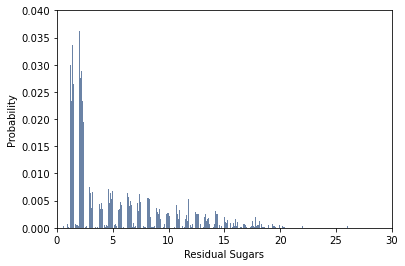

In [233]:
#PMFs for Residual Sugar - No grouping
pmf_rs = thinkstats2.Pmf(wine_dataset['residual_sugar'], label='Residual Sugar')
thinkplot.Hist(pmf_rs)
thinkplot.Config(xlabel='Residual Sugars',
                ylabel='Probability',
                axis=[0,30,0,0.04])

In [243]:
#PMF for Residual Sugar broken out by grape color
white_wine_dataset = wine_dataset.loc[wine_dataset['grape_color']=='white']
red_wine_dataset = wine_dataset.loc[wine_dataset['grape_color']=='red']
white_rs_pmf = thinkstats2.Pmf(white_wine_dataset['residual_sugar'] ,label='White')
red_rs_pmf = thinkstats2.Pmf(red_wine_dataset['residual_sugar'] , label='Red')
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(white_rs_pmf, align='right')
thinkplot.Hist(red_rs_pmf, align='left')
thinkplot.Config(xlabel='Residual Sugars',
                ylabel='Probability',
                axis=[0,30,0,0.07])

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([white_rs_pmf, red_rs_pmf])
thinkplot.show(xlabel='Residual Sugars',
              axis=[0,30,0,0.1])

KeyError: 'grape color'

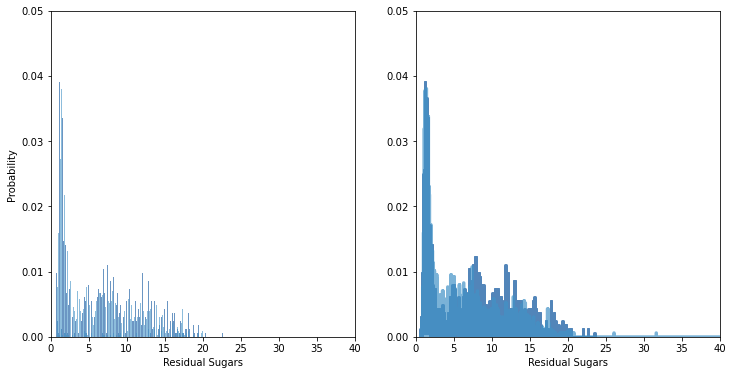

<Figure size 576x432 with 0 Axes>

In [242]:
#PMF for Residual Sugar of White Wines broken out by Quality >=6 or <6
white_wine_low_quality = white_wine_dataset.loc[white_wine_dataset['quality']<6]
white_wine_high_quality = white_wine_dataset.loc[white_wine_dataset['quality']>5]
white_low_pmf = thinkstats2.Pmf(white_wine_low_quality['residual_sugar'] ,label='Low Quality')
white_high_pmf = thinkstats2.Pmf(white_wine_high_quality['residual_sugar'], label='High Quality')
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(white_low_pmf, align='right')
thinkplot.Hist(white_high_pmf, align='left')
thinkplot.Config(xlabel='Residual Sugars',
                ylabel='Probability',
                axis=[0,40,0,0.05])

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([white_low_pmf, white_high_pmf])
thinkplot.show(xlabel='Residual Sugars',
              axis=[0,40,0,0.05])



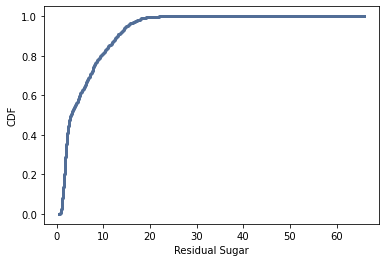

<Figure size 576x432 with 0 Axes>

In [218]:
#CDF of Residual Sugars
cdf = thinkstats2.Cdf(wine_dataset['residual_sugar'], label='Residual Sugar')
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='Residual Sugar', ylabel='CDF')

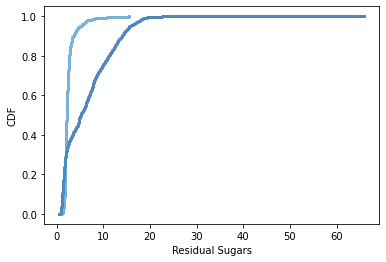

<Figure size 576x432 with 0 Axes>

In [219]:
#CDF of Residual Sugars by Grape Color
white_rs_cdf = thinkstats2.Cdf(white_wine_dataset['residual_sugar'],label='White')
red_rs_cdf = thinkstats2.Cdf(red_wine_dataset['residual_sugar'], label='Red')

thinkplot.PrePlot(2)
thinkplot.Cdfs([white_rs_cdf, red_rs_cdf])
thinkplot.Show(xlabel='Residual Sugars', ylabel='CDF')

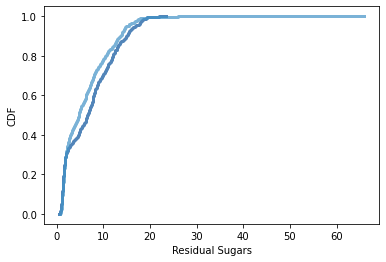

<Figure size 576x432 with 0 Axes>

In [220]:
#CDF of White Wine Residual Sugars by Quality
white_lowq_rs_cdf = thinkstats2.Cdf(white_wine_low_quality['residual_sugar'],label='Low Quality')
white_highq_rs_cdf = thinkstats2.Cdf(white_wine_high_quality['residual_sugar'], label='High Quality')

thinkplot.PrePlot(2)
thinkplot.Cdfs([white_lowq_rs_cdf, white_highq_rs_cdf])
thinkplot.Show(xlabel='Residual Sugars', ylabel='CDF')

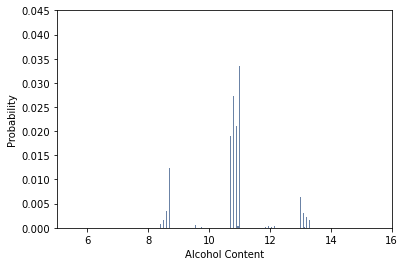

In [133]:
#PMFs for Alcohol - No grouping
pmf_rs = thinkstats2.Pmf(wine_dataset['alcohol'])
thinkplot.Hist(pmf_rs)
thinkplot.Config(xlabel='Alcohol Content',
                ylabel='Probability',
                axis=[5,16,0,0.045])

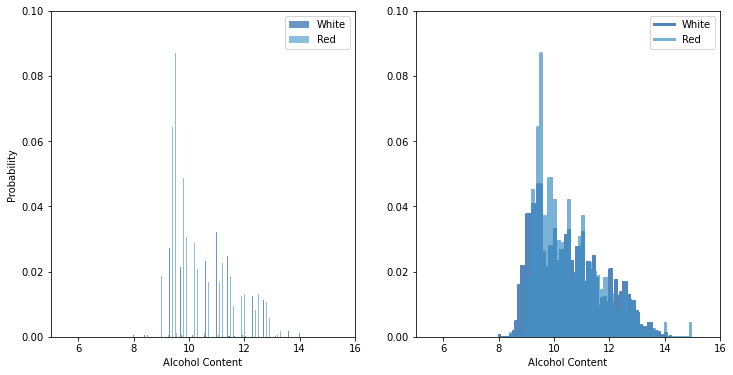

<Figure size 576x432 with 0 Axes>

In [136]:
#PMF for Alcohol Content broken out by grape color

white_alcohol_pmf = thinkstats2.Pmf(white_wine_dataset['alcohol'],label='White')
red_alcohol_pmf = thinkstats2.Pmf(red_wine_dataset['alcohol'], label='Red')
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(white_alcohol_pmf, align='right')
thinkplot.Hist(red_alcohol_pmf, align='left')
thinkplot.Config(xlabel='Alcohol Content',
                ylabel='Probability',
                axis=[5,16,0,0.1])

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([white_alcohol_pmf, red_alcohol_pmf])
thinkplot.show(xlabel='Alcohol Content',
              axis=[5,16,0,0.1])

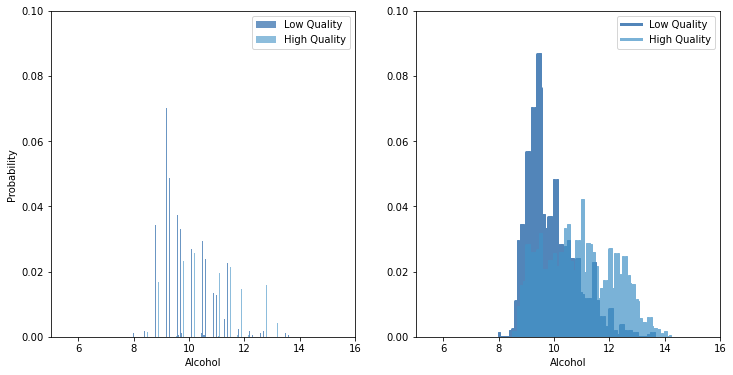

<Figure size 576x432 with 0 Axes>

In [138]:
#PMF for Residual Sugar of White Wines broken out by Quality >=6 or <6
white_lowq_alcohol_pmf = thinkstats2.Pmf(white_wine_low_quality['alcohol'],label='Low Quality')
white_highq_alcohol_pmf = thinkstats2.Pmf(white_wine_high_quality['alcohol'], label='High Quality')
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(white_lowq_alcohol_pmf, align='right')
thinkplot.Hist(white_highq_alcohol_pmf, align='left')
thinkplot.Config(xlabel='Alcohol',
                ylabel='Probability',
                axis=[5,16,0,0.1])

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([white_lowq_alcohol_pmf, white_highq_alcohol_pmf])
thinkplot.show(xlabel='Alcohol',
              axis=[5,16,0,0.1])

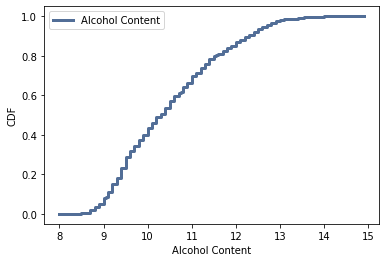

<Figure size 576x432 with 0 Axes>

In [139]:
#CDF of Alcohol Content
cdf = thinkstats2.Cdf(wine_dataset['alcohol'], label='Alcohol Content')
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='Alcohol Content', ylabel='CDF')

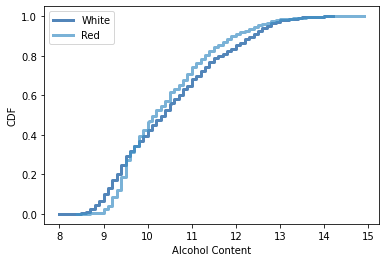

<Figure size 576x432 with 0 Axes>

In [143]:
#CDF of Alcohol Content by Grape Color
white_alc_cdf = thinkstats2.Cdf(white_wine_dataset['alcohol'],label='White')
red_alc_cdf = thinkstats2.Cdf(red_wine_dataset['alcohol'], label='Red')

thinkplot.PrePlot(2)
thinkplot.Cdfs([white_alc_cdf, red_alc_cdf])
thinkplot.Show(xlabel='Alcohol Content', ylabel='CDF')

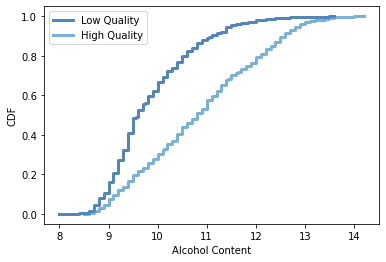

<Figure size 576x432 with 0 Axes>

In [144]:
#CDF of White Wine Alcohol Content by Quality
white_lowq_alc_cdf = thinkstats2.Cdf(white_wine_low_quality['alcohol'],label='Low Quality')
white_highq_alc_cdf = thinkstats2.Cdf(white_wine_high_quality['alcohol'], label='High Quality')

thinkplot.PrePlot(2)
thinkplot.Cdfs([white_lowq_alc_cdf, white_highq_alc_cdf])
thinkplot.Show(xlabel='Alcohol Content', ylabel='CDF')

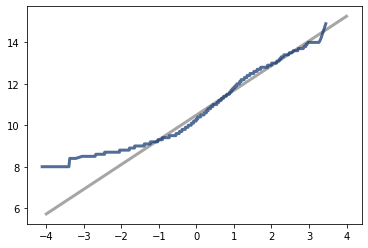

In [156]:
#Normal Probability Plot

def MakeNormalPlot(data, data_label):
    mean = data.mean()
    std = data.std()
    xs = [-4,4]
    fxs , fys = thinkstats2.FitLine(xs, inter=mean, slope=std)
    thinkplot.Plot(fxs, fys, color = 'gray', label = 'model')
    
    xs,xy = thinkstats2.NormalProbability(data)
    thinkplot.Plot(xs, xy, label = data_label)
    
MakeNormalPlot(wine_dataset['alcohol'], 'Alcohol Content')

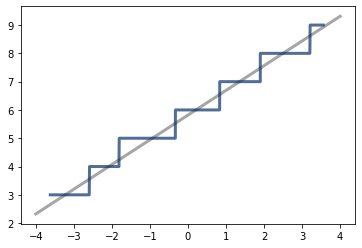

In [154]:
#Normal Plot for Quality
MakeNormalPlot(wine_dataset['quality'], 'Quality')

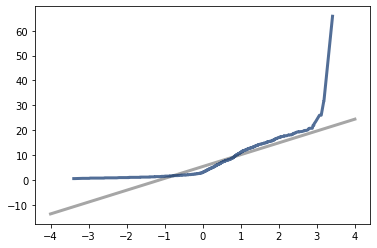

In [221]:
#Normal Plot for Residual Sugars
MakeNormalPlot(wine_dataset['residual_sugar'], 'Residual Sugar')

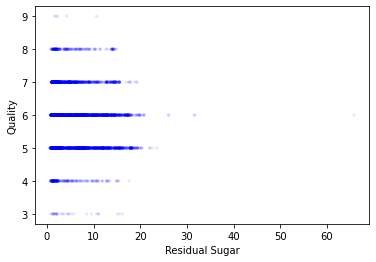

In [222]:
#Scatter Plots for Residual Sugars and Quality
thinkplot.Scatter(wine_dataset['residual_sugar'], wine_dataset['quality'], alpha=0.1,s=10)
thinkplot.Config(xlabel='Residual Sugar',
                 ylabel='Quality',
                 legend=False)

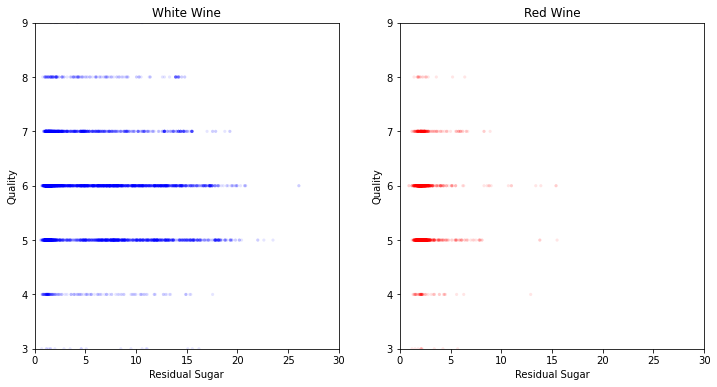

In [253]:
#Scatter Plots for Residual Sugars and Quality by wine type

thinkplot.PrePlot(2, cols=2)
thinkplot.Scatter(white_wine_dataset['residual_sugar'], white_wine_dataset['quality'], alpha=0.1,s=10)
thinkplot.Config(xlabel='Residual Sugar',
                 ylabel='Quality',
                 title='White Wine',
                axis=[0,30,3,9])

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Scatter(red_wine_dataset['residual_sugar'], red_wine_dataset['quality'], alpha=0.1,s=10, color='red')
thinkplot.Config(xlabel='Residual Sugar',
                 ylabel='Quality',
                 title='Red Wine', 
                 axis=[0,30,3,9])

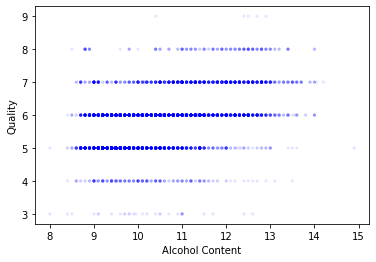

In [158]:
#Scatter Plots for Alcohol and Quality
thinkplot.Scatter(wine_dataset['alcohol'], wine_dataset['quality'], alpha=0.1,s=10)
thinkplot.Config(xlabel='Alcohol Content',
                 ylabel='Quality',
                 legend=False)

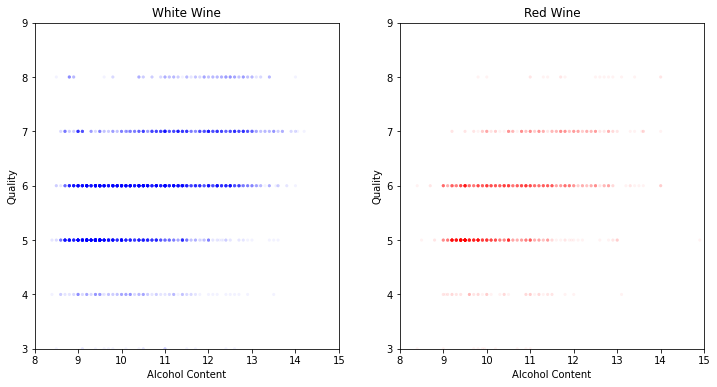

In [258]:
#Scatter Plots for Alcohol Content and Quality by wine type

thinkplot.PrePlot(2, cols=2)
thinkplot.Scatter(white_wine_dataset['alcohol'], white_wine_dataset['quality'], alpha=0.05,s=10)
thinkplot.Config(xlabel='Alcohol Content',
                 ylabel='Quality',
                 title='White Wine',
                axis=[8,15,3,9])

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Scatter(red_wine_dataset['alcohol'], red_wine_dataset['quality'], alpha=0.05,s=10, color='red')
thinkplot.Config(xlabel='Alcohol Content',
                 ylabel='Quality',
                 title='Red Wine', 
                 axis=[8,15,3,9])

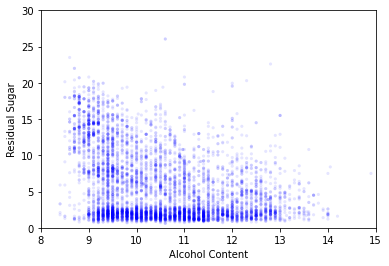

In [265]:
#Scatter Plots for Alcohol and Residual Sugar
thinkplot.Scatter(wine_dataset['alcohol'], wine_dataset['residual_sugar'], alpha=0.1,s=10)
thinkplot.Config(xlabel='Alcohol Content',
                 ylabel='Residual Sugar',
                 legend=False,
                axis=[8,15,0,30])

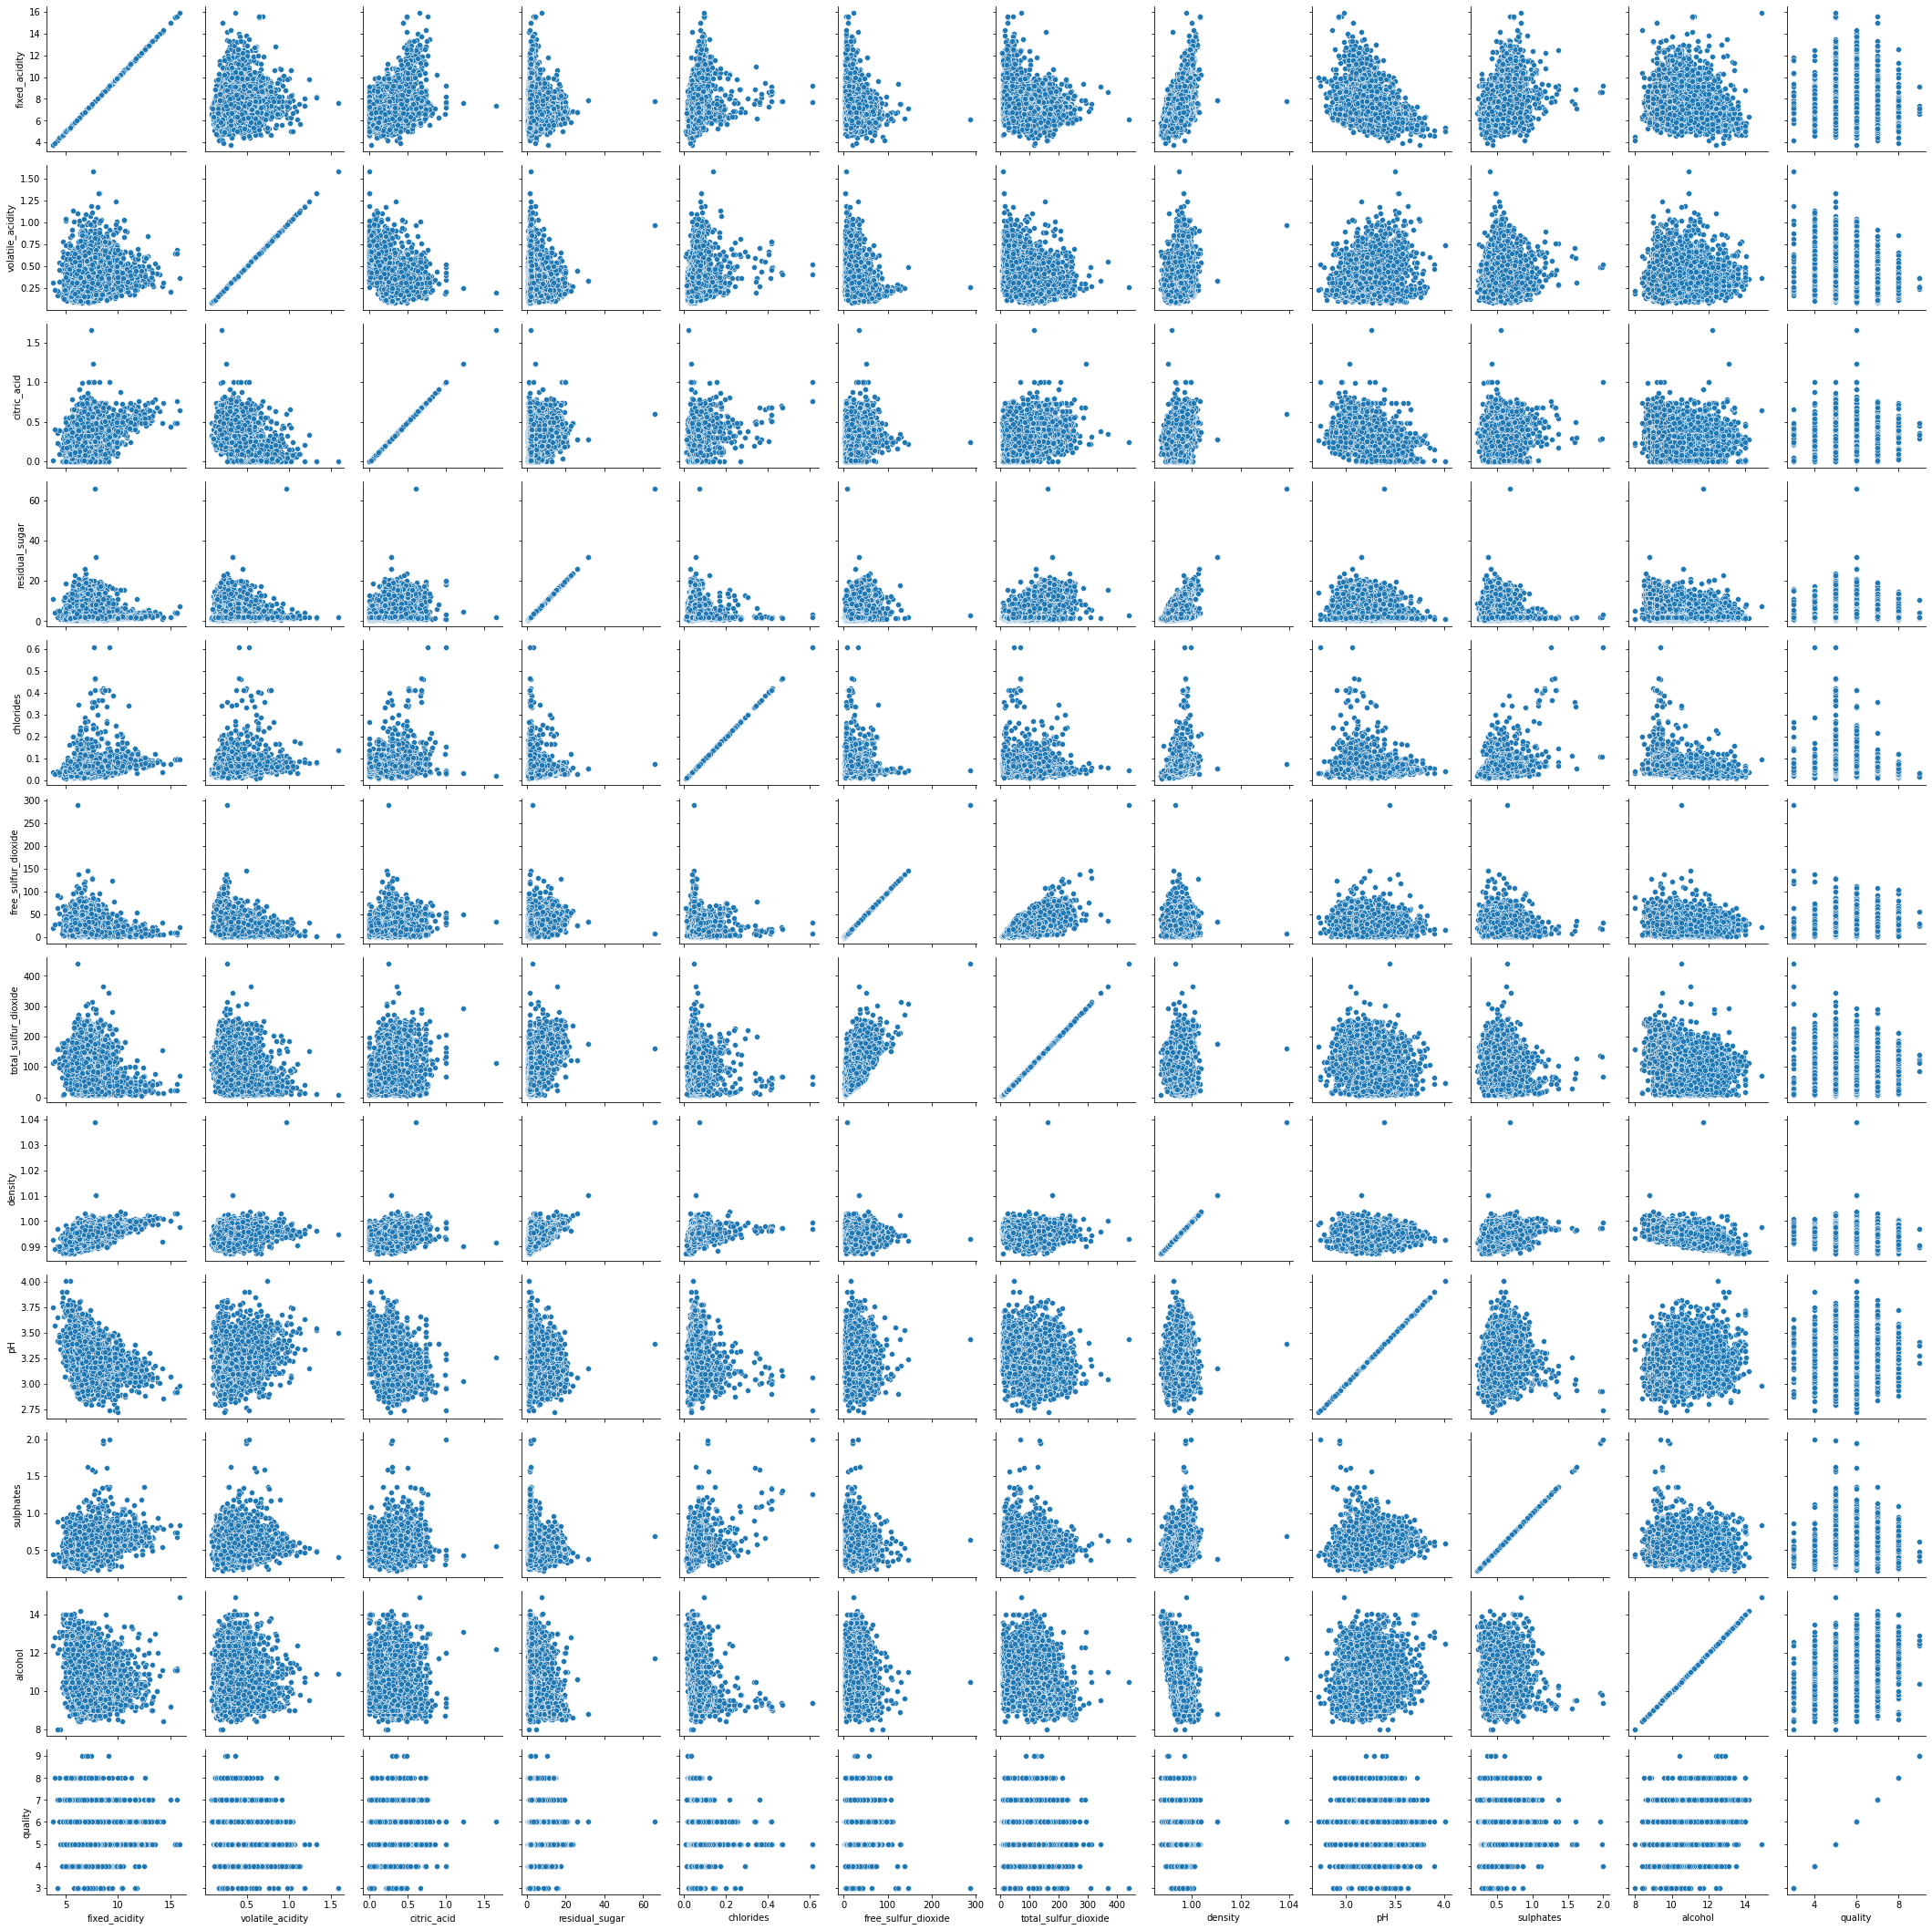

In [266]:
g = sns.PairGrid(wine_dataset)
g.map(sns.scatterplot)

In [160]:
#Covariance and Correlation Functions
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [260]:
#calculate Covariance
cov_fa = Cov(wine_dataset['fixed_acidity'], wine_dataset['quality'])
cov_va = Cov(wine_dataset['volatile_acidity'], wine_dataset['quality'])
cov_ca = Cov(wine_dataset['citric_acid'], wine_dataset['quality'])
cov_rs = Cov(wine_dataset['residual_sugar'], wine_dataset['quality'])
cov_chl = Cov(wine_dataset['chlorides'], wine_dataset['quality'])
cov_fsd = Cov(wine_dataset['free_sulfur_dioxide'], wine_dataset['quality'])
cov_tsd = Cov(wine_dataset['total_sulfur_dioxide'], wine_dataset['quality'])
cov_den = Cov(wine_dataset['density'], wine_dataset['quality'])
cov_ph = Cov(wine_dataset['pH'], wine_dataset['quality'])
cov_sulp = Cov(wine_dataset['sulphates'], wine_dataset['quality'])
cov_alc = Cov(wine_dataset['alcohol'], wine_dataset['quality'])

In [261]:
#Print Covariances
print('Fixed Acidity Covariance', cov_fa)
print('Volatile Acidity Covariance', cov_va)
print('Citric Acid Covariance', cov_ca)
print('Residual Sugar Covariance', cov_rs)
print('Chlorides Covariance', cov_chl)
print('Free Sulfur Dioxide Covariance', cov_fsd)
print('Total Sulfur Dioxide Covariance', cov_tsd)
print('Density Covariance', cov_den)
print('pH Covariance', cov_ph)
print('Sulphates Covariance', cov_sulp)
print('Alcohol Content Covariance', cov_alc)

Fixed Acidity Covariance -0.08686896468170188
Volatile Acidity Covariance -0.038193646354201104
Citric Acid Covariance 0.010852269368874835
Residual Sugar Covariance -0.15362202547681333
Chlorides Covariance -0.006138070355058322
Free Sulfur Dioxide Covariance 0.8595316093960229
Total Sulfur Dioxide Covariance -2.0423891312335134
Density Covariance -0.0008007983807020582
pH Covariance 0.0027383406068307893
Sulphates Covariance 0.005000241287764525
Alcohol Content Covariance 0.46270509169683777


In [259]:
#calculate Correlations
corr_fa = Corr(wine_dataset['fixed_acidity'], wine_dataset['quality'])
corr_va = Corr(wine_dataset['volatile_acidity'], wine_dataset['quality'])
corr_ca = Corr(wine_dataset['citric_acid'], wine_dataset['quality'])
corr_rs = Corr(wine_dataset['residual_sugar'], wine_dataset['quality'])
corr_chl = Corr(wine_dataset['chlorides'], wine_dataset['quality'])
corr_fsd = Corr(wine_dataset['free_sulfur_dioxide'], wine_dataset['quality'])
corr_tsd = Corr(wine_dataset['total_sulfur_dioxide'], wine_dataset['quality'])
corr_den = Corr(wine_dataset['density'], wine_dataset['quality'])
corr_ph = Corr(wine_dataset['pH'], wine_dataset['quality'])
corr_sulp = Corr(wine_dataset['sulphates'], wine_dataset['quality'])
corr_alc = Corr(wine_dataset['alcohol'], wine_dataset['quality'])

In [224]:
#Print Correlations 
print('Fixed Acidity Correlation', corr_fa)
print('Volatile Acidity Correlation', corr_va)
print('Citric Acid Correlation', corr_ca)
print('Residual Sugar Correlation', corr_rs)
print('Chlorides Correlation', corr_chl)
print('Free Sulfur Dioxide Correlation', corr_fsd)
print('Total Sulfur Dioxide Correlation', corr_tsd)
print('Density Correlation', corr_den)
print('pH Correlation', corr_ph)
print('Sulphates Correlation', corr_sulp)
print('Alcohol Content Correlation', corr_alc)

Fixed Acidity Correlation -0.07674320790961987
Volatile Acidity Correlation -0.26569947761146784
Citric Acid Correlation 0.08553171718367845
Residual Sugar Correlation -0.03698048458576943
Chlorides Correlation -0.200665500435102
Free Sulfur Dioxide Correlation 0.05546305861663266
Total Sulfur Dioxide Correlation -0.041385453855608816
Density Correlation -0.3058579060694138
pH Correlation 0.019505703714435857
Sulphates Correlation 0.038485445876514444
Alcohol Content Correlation 0.4443185200075176


In [176]:
#Using a hypothesis test - testing a correlation 
#I will be testing the highest correlation I just found - alcohol content and quality

class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys
    
data = wine_dataset['alcohol'], wine_dataset['quality']
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

In [225]:
#What about residual sugar since that's the other variable we've been looking at?
data = wine_dataset['residual_sugar'], wine_dataset['quality']
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.004

In [178]:
#What about pH since that's the lowest correlation variable?
data = wine_dataset['pH'], wine_dataset['quality']
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.105

In [181]:
formula = 'quality ~ alcohol'
model = smf.ols(formula, data=wine_dataset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     1598.
Date:                Sat, 05 Mar 2022   Prob (F-statistic):          1.50e-312
Time:                        14:17:42   Log-Likelihood:                -7623.4
No. Observations:                6497   AIC:                         1.525e+04
Df Residuals:                    6495   BIC:                         1.526e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4053      0.086     27.988      0.000       2.237       2.574
alcohol        0.3253      0.008     39.970      0.000       0.309       0.341
==============================================================================
Omnibus:                      123.922   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.800
Skew:                           0.031   Prob(JB):                     6.34e-57
Kurtosis:                       3.976   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [226]:
formula = 'quality ~ alcohol + chlorides + sulphates + density + pH + grape_color + residual_sugar + fixed_acidity + volatile_acidity + citric_acid + free_sulfur_dioxide + total_sulfur_dioxide'
model = smf.ols(formula, data=wine_dataset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     227.8
Date:                Sat, 05 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:27:24   Log-Likelihood:                -7195.2
No. Observations:                6497   AIC:                         1.442e+04
Df Residuals:                    6484   BIC:                         1.450e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              104.7518     14.136      7.411      0.000      77.041     132.462
grape_color[T.white]    -0.3613      0.057     -6.367      0.000      -0.473      -0.250
alcohol                  0.2227      0.018     12.320      0.000       0.187       0.258
chlorides               -0.7573      0.334     -2.264      0.024      -1.413      -0.102
sulphates                0.7217      0.076      9.466      0.000       0.572       0.871
density               -103.9096     14.336     -7.248      0.000    -132.013     -75.806
pH                       0.4988      0.091      5.506      0.000       0.321       0.676
residual_sugar           0.0624      0.006     10.522      0.000       0.051       0.074
fixed_acidity            0.0851      0.016      5.396      0.000       0.054       0.116
volatile_acidity        -1.4924      0.081    -18.345      0.000      -1.652      -1.333
citric_acid             -0.0626      0.080     -0.786      0.432      -0.219       0.094
free_sulfur_dioxide      0.0049      0.001      6.443      0.000       0.003       0.006
total_sulfur_dioxide    -0.0014      0.000     -4.333      0.000      -0.002      -0.001
==============================================================================
Omnibus:                      140.992   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.985
Skew:                           0.016   Prob(JB):                     6.59e-69
Kurtosis:                       4.077   Cond. No.                     2.96e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [230]:
formula = 'quality ~ chlorides'
model = smf.ols(formula, data=wine_dataset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     272.5
Date:                Sat, 05 Mar 2022   Prob (F-statistic):           5.32e-60
Time:                        14:29:50   Log-Likelihood:                -8204.3
No. Observations:                6497   AIC:                         1.641e+04
Df Residuals:                    6495   BIC:                         1.643e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0986      0.020    304.580      0.000       6.059       6.138
chlorides     -5.0018      0.303    -16.508      0.000      -5.596      -4.408
==============================================================================
Omnibus:                       39.305   Durbin-Watson:                   1.678
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.004
Skew:                           0.151   Prob(JB):                     4.59e-10
Kurtosis:                       3.260   Cond. No.                         28.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [267]:
formula = 'quality ~ alcohol + chlorides + sulphates + density + pH + grape_color + residual_sugar + fixed_acidity + volatile_acidity + citric_acid + free_sulfur_dioxide + total_sulfur_dioxide'
model = smf.ols(formula, data=white_wine_dataset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Sat, 05 Mar 2022   Prob (F-statistic):               0.00
Time:                        22:32:12   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              150.1928     18.804      7.987      0.000     113.328     187.057
alcohol                  0.1935      0.024      7.988      0.000       0.146       0.241
chlorides               -0.2473      0.547     -0.452      0.651      -1.319       0.824
sulphates                0.6315      0.100      6.291      0.000       0.435       0.828
density               -150.2842     19.075     -7.879      0.000    -187.679    -112.890
pH                       0.6863      0.105      6.513      0.000       0.480       0.893
residual_sugar           0.0815      0.008     10.825      0.000       0.067       0.096
fixed_acidity            0.0655      0.021      3.139      0.002       0.025       0.106
volatile_acidity        -1.8632      0.114    -16.373      0.000      -2.086      -1.640
citric_acid              0.0221      0.096      0.231      0.818      -0.166       0.210
free_sulfur_dioxide      0.0037      0.001      4.422      0.000       0.002       0.005
total_sulfur_dioxide    -0.0003      0.000     -0.756      0.450      -0.001       0.000
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                     3.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [268]:
formula = 'quality ~ alcohol + chlorides + sulphates + density + pH + grape_color + residual_sugar + fixed_acidity + volatile_acidity + citric_acid + free_sulfur_dioxide + total_sulfur_dioxide'
model = smf.ols(formula, data=red_wine_dataset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Sat, 05 Mar 2022   Prob (F-statistic):          1.79e-145
Time:                        22:32:23   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               21.9652     21.195      1.036      0.300     -19.607      63.538
alcohol                  0.2762      0.026     10.429      0.000       0.224       0.328
chlorides               -1.8742      0.419     -4.470      0.000      -2.697      -1.052
sulphates                0.9163      0.114      8.014      0.000       0.692       1.141
density                -17.8812     21.633     -0.827      0.409     -60.314      24.551
pH                      -0.4137      0.192     -2.159      0.031      -0.789      -0.038
residual_sugar           0.0163      0.015      1.089      0.276      -0.013       0.046
fixed_acidity            0.0250      0.026      0.963      0.336      -0.026       0.076
volatile_acidity        -1.0836      0.121     -8.948      0.000      -1.321      -0.846
citric_acid             -0.1826      0.147     -1.240      0.215      -0.471       0.106
free_sulfur_dioxide      0.0044      0.002      2.009      0.045       0.000       0.009
total_sulfur_dioxide    -0.0033      0.001     -4.480      0.000      -0.005      -0.002
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     1.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [281]:
# check for multicollinearity 
corr_df=wine_dataset.iloc[:,1:].corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))
corr_df.set_index(['pairs'], inplace=True)
corr_df.drop(columns=['level_1', 'level_0'], inplace = True)
corr_df.columns = ['cc']
corr_df.drop_duplicates(inplace=True)
corr_df = corr_df[corr_df.cc < 1]
multicollinear = corr_df[(corr_df.cc>=.75) & (corr_df.cc <1)]
print(corr_df)

                                                   cc
pairs                                                
(free_sulfur_dioxide, total_sulfur_dioxide)  0.720934
(density, alcohol)                           0.686745
(density, residual_sugar)                    0.552517
(residual_sugar, total_sulfur_dioxide)       0.495482
(quality, alcohol)                           0.444319
(volatile_acidity, total_sulfur_dioxide)     0.414476
(free_sulfur_dioxide, residual_sugar)        0.402871
(sulphates, chlorides)                       0.395593
(volatile_acidity, citric_acid)              0.377981
(chlorides, volatile_acidity)                0.377124
(density, chlorides)                         0.362615
(alcohol, residual_sugar)                    0.359415
(volatile_acidity, free_sulfur_dioxide)      0.352557
(citric_acid, pH)                            0.329808
(quality, density)                           0.305858
(chlorides, total_sulfur_dioxide)            0.279630
(sulphates, total_sulfur_dio

In [269]:
# check for correlations with quality (non thinkstats) 
corr_df = corr_df.reset_index()
quality_correlations = corr_df[corr_df.pairs.apply(lambda x: True if 'quality' in x else False)]
quality_correlations = quality_correlations.sort_values(by='cc',ascending=False)
quality_correlations.pairs = quality_correlations.pairs.apply(lambda x: list(filter(lambda i: i != 'quality', list(x)))[0])
quality_correlations.head(10)




,pairs,cc
4,alcohol,0.444319
14,density,0.305858
20,volatile_acidity,0.265699
26,chlorides,0.200666
40,citric_acid,0.085532
42,free_sulfur_dioxide,0.055463
44,total_sulfur_dioxide,0.041385
46,sulphates,0.038485
48,residual_sugar,0.036980
51,pH,0.019506


In [287]:
# check for multicollinearity - red wine 
corr_df=red_wine_dataset.iloc[:,1:].corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))
corr_df.set_index(['pairs'], inplace=True)
corr_df.drop(columns=['level_1', 'level_0'], inplace = True)
corr_df.columns = ['cc']
corr_df.drop_duplicates(inplace=True)
corr_df = corr_df[corr_df.cc < 1]
multicollinear = corr_df[(corr_df.cc>=.75) & (corr_df.cc <1)]
print(corr_df)

# check for correlations with quality (non thinkstats) - red wine
corr_df = corr_df.reset_index()
quality_correlations = corr_df[corr_df.pairs.apply(lambda x: True if 'quality' in x else False)]
quality_correlations = quality_correlations.sort_values(by='cc',ascending=False)
quality_correlations.pairs = quality_correlations.pairs.apply(lambda x: list(filter(lambda i: i != 'quality', list(x)))[0])
quality_correlations.head(10)


                                                   cc
pairs                                                
(free_sulfur_dioxide, total_sulfur_dioxide)  0.667666
(citric_acid, volatile_acidity)              0.552496
(pH, citric_acid)                            0.541904
(alcohol, density)                           0.496180
(quality, alcohol)                           0.476166
(quality, volatile_acidity)                  0.390558
(sulphates, chlorides)                       0.371260
(density, citric_acid)                       0.364947
(residual_sugar, density)                    0.355283
(density, pH)                                0.341699
(citric_acid, sulphates)                     0.312770
(chlorides, pH)                              0.265026
(volatile_acidity, sulphates)                0.260987
(sulphates, quality)                         0.251397
(pH, volatile_acidity)                       0.234937
(citric_acid, quality)                       0.226373
(chlorides, alcohol)        

,pairs,cc
4,alcohol,0.476166
5,volatile_acidity,0.390558
13,sulphates,0.251397
15,citric_acid,0.226373
25,total_sulfur_dioxide,0.185100
26,density,0.174919
29,chlorides,0.128907
40,pH,0.057731
43,free_sulfur_dioxide,0.050656
50,residual_sugar,0.013732


In [292]:
# check for multicollinearity - white wine 
corr_df=white_wine_dataset.iloc[:,1:].corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))
corr_df.set_index(['pairs'], inplace=True)
corr_df.drop(columns=['level_1', 'level_0'], inplace = True)
corr_df.columns = ['cc']
corr_df.drop_duplicates(inplace=True)
corr_df = corr_df[corr_df.cc < 1]
multicollinear = corr_df[(corr_df.cc>=.75) & (corr_df.cc <1)]
print(corr_df)

# check for correlations with quality (non thinkstats) - white wine
corr_df = corr_df.reset_index()
quality_correlations = corr_df[corr_df.pairs.apply(lambda x: True if 'quality' in x else False)]
quality_correlations = quality_correlations.sort_values(by='cc',ascending=False)
quality_correlations.pairs = quality_correlations.pairs.apply(lambda x: list(filter(lambda i: i != 'quality', list(x)))[0])
quality_correlations.head(10)


                                                   cc
pairs                                                
(residual_sugar, density)                    0.838966
(alcohol, density)                           0.780138
(free_sulfur_dioxide, total_sulfur_dioxide)  0.615501
(total_sulfur_dioxide, density)              0.529881
(alcohol, residual_sugar)                    0.450631
(alcohol, total_sulfur_dioxide)              0.448892
(quality, alcohol)                           0.435575
(total_sulfur_dioxide, residual_sugar)       0.401439
(alcohol, chlorides)                         0.360189
(density, quality)                           0.307123
(free_sulfur_dioxide, residual_sugar)        0.299098
(density, free_sulfur_dioxide)               0.294210
(chlorides, density)                         0.257211
(alcohol, free_sulfur_dioxide)               0.250104
(chlorides, quality)                         0.209934
(chlorides, total_sulfur_dioxide)            0.198910
(quality, volatile_acidity) 

,pairs,cc
6,alcohol,0.435575
9,density,0.307123
14,chlorides,0.209934
16,volatile_acidity,0.194723
18,total_sulfur_dioxide,0.174737
28,pH,0.099427
29,residual_sugar,0.097577
44,sulphates,0.053678
51,citric_acid,0.009209
52,free_sulfur_dioxide,0.008158


In [291]:
#white wine
formula = 'quality ~ alcohol +  volatile_acidity +chlorides'
model = smf.ols(formula, data=white_wine_dataset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     519.1
Date:                Sun, 06 Mar 2022   Prob (F-statistic):          6.85e-293
Time:                        10:07:57   Log-Likelihood:                -5678.0
No. Observations:                4898   AIC:                         1.136e+04
Df Residuals:                    4894   BIC:                         1.139e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.1790      0.114     27.820      0.000       2.955       3.403
alcohol              0.3147      0.010     32.605      0.000       0.296       0.334
volatile_acidity    -1.9484      0.110    -17.677      0.000      -2.164      -1.732
chlorides           -1.4906      0.544     -2.741      0.006      -2.557      -0.424
==============================================================================
Omnibus:                       88.466   Durbin-Watson:                   1.629
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.958
Skew:                           0.043   Prob(JB):                     2.28e-39
Kurtosis:                       3.930   Cond. No.                         528.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [290]:
#red wine
formula = 'quality ~ alcohol +  volatile_acidity + sulphates'
model = smf.ols(formula, data=red_wine_dataset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     268.9
Date:                Sun, 06 Mar 2022   Prob (F-statistic):          3.16e-141
Time:                        10:07:47   Log-Likelihood:                -1599.4
No. Observations:                1599   AIC:                             3207.
Df Residuals:                    1595   BIC:                             3228.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.6108      0.196     13.342      0.000       2.227       2.995
alcohol              0.3092      0.016     19.566      0.000       0.278       0.340
volatile_acidity    -1.2214      0.097    -12.591      0.000      -1.412      -1.031
sulphates            0.6790      0.101      6.737      0.000       0.481       0.877
==============================================================================
Omnibus:                       22.086   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.420
Skew:                          -0.109   Prob(JB):                     3.36e-08
Kurtosis:                       3.685   Cond. No.                         133.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [298]:
#white wine single regression
formula = 'quality ~ alcohol '
model = smf.ols(formula, data=white_wine_dataset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     1146.
Date:                Sun, 06 Mar 2022   Prob (F-statistic):          5.61e-226
Time:                        10:22:12   Log-Likelihood:                -5839.4
No. Observations:                4898   AIC:                         1.168e+04
Df Residuals:                    4896   BIC:                         1.170e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5820      0.098     26.345      0.000       2.390       2.774
alcohol        0.3135      0.009     33.858      0.000       0.295       0.332
==============================================================================
Omnibus:                       88.780   Durbin-Watson:                   1.637
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.233
Skew:                           0.031   Prob(JB):                     7.29e-40
Kurtosis:                       3.938   Cond. No.                         91.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [300]:
#red wine single regression
formula = 'quality ~ alcohol '
model = smf.ols(formula, data=red_wine_dataset)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     468.3
Date:                Sun, 06 Mar 2022   Prob (F-statistic):           2.83e-91
Time:                        10:23:05   Log-Likelihood:                -1721.1
No. Observations:                1599   AIC:                             3446.
Df Residuals:                    1597   BIC:                             3457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8750      0.175     10.732      0.000       1.532       2.218
alcohol        0.3608      0.017     21.639      0.000       0.328       0.394
==============================================================================
Omnibus:                       38.501   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.758
Skew:                          -0.154   Prob(JB):                     2.62e-16
Kurtosis:                       3.991   Cond. No.                         104.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""